In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as pluie

1. Transformer le fichier pluvio_senegal.xlsx en DataFrame et afficher les noms des feuilles.

In [173]:
pluies=pd.ExcelFile("pluvio_senegal.xlsx", engine='openpyxl')
# Affichage des noms de feuilles
print(pluies.sheet_names)

['Pluvio_fatick', 'Pluvio_Toubacouta', 'Pluvio_Foundioune']


2. Charger et afficher une feuille de votre choix.

In [174]:
# Chargement d'une feuille de calcul dans le DataFrame sous le nom de "etud1"
Fatick = pluies.parse("Pluvio_fatick",usecols="B:N",index=False)
Fatick

,Annees,Janv,Fevr,Mars,Avr,Mai,Juin,Juil,Aout,Sept,Oct,Nov,Dec
0,1950,0.0,0.0,0.0,0,2.0,48.4,201.9,533.9,359.0,73.8,1.2,0.0
1,1951,0.0,0.0,0.0,0,2.0,11.7,104.1,308.7,343.1,244.1,1.3,0.0
2,1952,0.0,0.0,0.0,0,20.2,33.2,129.3,256.6,305.9,102.6,0.0,0.0
3,1953,0.0,0.0,0.0,0,0.0,8.2,251.8,204.6,284.0,110.2,0.0,0.0
4,1954,0.0,18.4,0.0,0,0.0,93.1,131.5,269.1,97.5,19.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2013,0.0,0.0,0.0,0,NaN,58.7,108.6,396.9,134.0,65.0,1.5,0.0
64,2014,0.0,0.0,0.0,0,0.0,NaN,12.6,203.6,138.9,61.8,0.0,0.0
65,2015,0.0,0.0,0.0,0,0.0,0.0,156.0,252.8,260.2,29.2,0.0,0.0
66,2016,0.0,0.0,0.0,0,0.0,NaN,264.2,85.3,228.3,15.2,0.0,0.0


3. Tracer la courbe de la pluviométrie du mois de janvier en fonction des années.

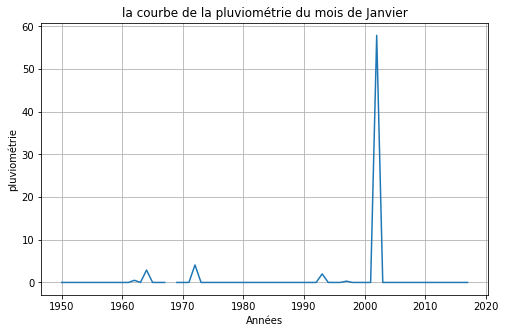

In [175]:
x1 = np.array(Fatick[Fatick.columns[0]])
y1 = np.array(Fatick[Fatick.columns[1]])
fig1, ax1 = plt.subplots(figsize=(8,5)) 
ax1.plot(x1, y1) 
plt.title("la courbe de la pluviométrie du mois de Janvier") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("pluviométrie")
plt.grid()
plt.show()

4. Afficher la courbe de la question 3 entre 2000 et 2010.

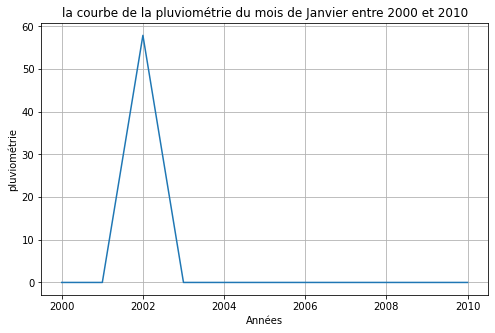

In [176]:
# Extraction des lignes (iloc)
annees=Fatick.query('2000 <= Annees <= 2010') #envoie le dataframe des conditions verifiées
x2 = np.array(annees[annees.columns[0]])
y2 = np.array(annees[annees.columns[1]])
fig2, ax2 = plt.subplots(figsize=(8,5)) 
ax2.plot(x2, y2)
plt.title("la courbe de la pluviométrie du mois de Janvier entre 2000 et 2010") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("pluviométrie")
plt.grid()
plt.show()

5. Ecrire un programme qui permet de récupérer l’année où la courbe est maximale.

In [177]:
max_pluvio=np.array(Fatick[Fatick.columns[1]]) # la liste de la pluviometrie du mois de Janvier
annees_max=np.argmax(max_pluvio==max(max_pluvio)) # argmax(liste=l'element) donne le premier indice de l'element
annees=Fatick.Annees
print("L'années ou la courbe est maximal est : ",annees[annees_max])

L'années ou la courbe est maximal est :  2002


6. Ecrire un programme qui calcule la moyenne mensuelle de la pluviométrie pour les intervalles d’années suivants :

In [184]:
annees1=Fatick.query('1950 <= Annees <= 1969')
annees2=Fatick.query('1970 <= Annees <= 1999')
annees3=Fatick.query('2000 <= Annees <= 2017')
list_df=[annees1,annees2,annees3]
moy_annuelle = []
for annee in list_df:
    annee = annee.drop("Annees",axis=1)
    moy = np.nanmean(annee,axis=0)
    moy_annuelle.append(moy)
print("La moyenne de la pluviométrie de 1950 à 1969 est : \n",moy_annuelle[0])
print("La moyenne de la pluviométrie de 1970 à 1999 est : \n",moy_annuelle[1])
print("La moyenne de la pluviométrie de 2000 à 2017 est : \n",moy_annuelle[2])

La moyenne de la pluviométrie de 1950 à 1969 est : 
 [1.78947368e-01 1.35789474e+00 0.00000000e+00 0.00000000e+00
 1.94000000e+00 4.49450000e+01 1.47845000e+02 2.86430000e+02
 2.41180000e+02 7.61150000e+01 2.75000000e-01 1.09000000e+00]
La moyenne de la pluviométrie de 1970 à 1999 est : 
 [2.13333333e-01 9.70000000e-01 1.00000000e-02 0.00000000e+00
 4.40000000e-01 2.85800000e+01 1.00206667e+02 2.00973333e+02
 1.46736667e+02 2.74966667e+01 1.05333333e+00 1.60333333e+00]
La moyenne de la pluviométrie de 2000 à 2017 est : 
 [3.21666667e+00 1.83333333e-01 2.27777778e-01 0.00000000e+00
 4.75000000e-01 3.19125000e+01 1.29494444e+02 2.43244444e+02
 1.83444444e+02 4.85611111e+01 5.00000000e-01 0.00000000e+00]


7. Tracer la moyenne de la pluviométrie entre 1950 et 1969.

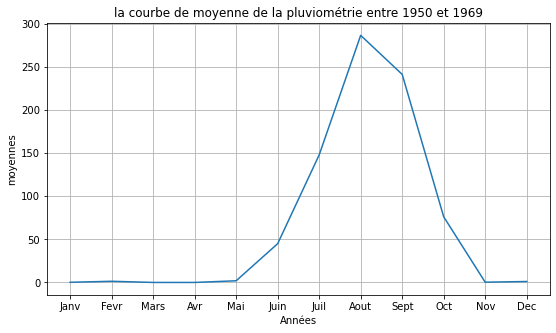

In [185]:
x3 = np.array(list_mois)
y3 = np.array(moy_annuelle[0])
fig3, ax3 = plt.subplots(figsize=(9,5))
ax3.plot(x3,y3)
plt.title("la courbe de moyenne de la pluviométrie entre 1950 et 1969") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("moyennes")
plt.grid()
plt.show()

8. Tracer la moyenne de la pluviométrie entre 1970 et 1999.

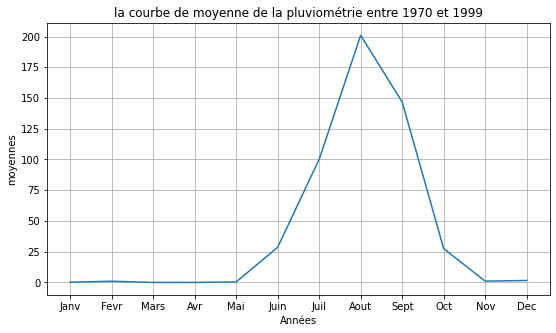

In [186]:
x4 = np.array(list_mois)
y4 = np.array(moy_annuelle[1])
fig4, ax4 = plt.subplots(figsize=(9,5))
ax4.plot(x4,y4)
plt.title("la courbe de moyenne de la pluviométrie entre 1970 et 1999") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("moyennes")
plt.grid()
plt.show()

9. Tracer la moyenne de la pluviométrie entre 2000 et 1917.

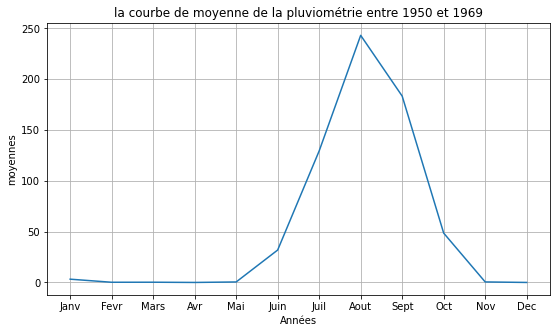

In [187]:
x5 = np.array(list_mois)
y5 = np.array(moy_annuelle[2])
fig5, ax5 = plt.subplots(figsize=(9,5))
ax5.plot(x5,y5)
plt.title("la courbe de moyenne de la pluviométrie entre 1950 et 1969") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("moyennes")
plt.grid()
plt.show()

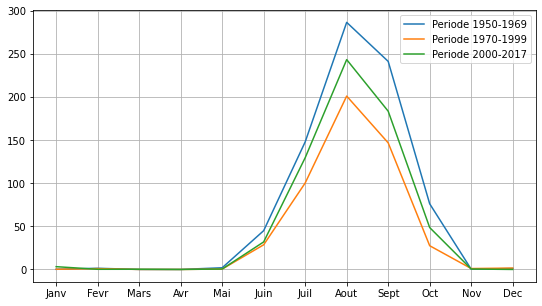

In [188]:
fig10, ax10 = plt.subplots(figsize=(9,5))
plt.plot(x3,y3, label = "Periode 1950-1969")
plt.plot(x4,y4, label = "Periode 1970-1999")
plt.plot(x5,y5, label = "Periode 2000-2017")
plt.grid()
plt.legend()
plt.show()

10. Dans cette partie, on demandera d’écrire un programme qui permet de :

        • créer et remplir un vecteur représentant la somme pluviométrique annuelle ;

In [189]:
Df_pluvio_annuelle = Fatick
Df_pluvio_annuelle = Df_pluvio_annuelle.drop("Annees",axis=1)
som_pluvio_an = np.nansum(Df_pluvio_annuelle, axis=1)
som_pluvio_an

array([1220.2       , 1015.        ,  847.8       ,  858.8       ,
        629.3       ,  988.3       ,  842.4       , 1051.        ,
        827.3       ,  630.1       ,  644.6       ,  668.2       ,
        482.2       ,  740.7       ,  850.8       ,  643.1       ,
        823.8       ,  976.7       ,  335.3       ,  950.        ,
        490.2       ,  629.9       ,  298.1       ,  394.4       ,
        438.6       ,  665.8       ,  672.6       ,  373.2       ,
        522.8       ,  517.7       ,  349.39999998,  514.19999996,
        579.19999991,  272.50000001,  534.79999998,  632.49999988,
        451.79999997,  574.79999982,  615.40000002,  688.79999988,
        314.69999999,  428.70000002,  466.70000003,  543.89999989,
        548.79999989,  747.89999996,  439.00000001,  396.79999996,
        472.59999991,  672.69999997,  779.9       ,  555.9       ,
        462.7       ,  560.5       ,  510.7       ,  668.8       ,
        608.3       ,  336.6       ,  841.        ,  898.     

        • déterminer la moyenne du vecteur obtenu ;

In [190]:
moy_somme = np.nanmean(som_pluvio_an)
print("La moyenne du vecteur représentant la somme pluviométrique annuelle est : ",moy_somme)

La moyenne du vecteur représentant la somme pluviométrique annuelle est :  628.7058823389409


        • calculer la différence entre le vecteur et sa moyenne.

In [191]:
diff_pluvio = som_pluvio_an - moy_somme
print("la différence entre le vecteur et sa moyenne est : ",diff_pluvio)

la différence entre le vecteur et sa moyenne est :  [ 591.49411766  386.29411766  219.09411766  230.09411766    0.59411766
  359.59411766  213.69411766  422.29411766  198.59411766    1.39411766
   15.89411766   39.49411766 -146.50588234  111.99411766  222.09411766
   14.39411766  195.09411766  347.99411766 -293.40588234  321.29411766
 -138.50588234    1.19411766 -330.60588234 -234.30588234 -190.10588234
   37.09411766   43.89411766 -255.50588234 -105.90588234 -111.00588234
 -279.30588236 -114.50588238  -49.50588242 -356.20588233  -93.90588236
    3.79411754 -176.90588236  -53.90588252  -13.30588232   60.09411754
 -314.00588235 -200.00588232 -162.00588231  -84.80588245  -79.90588245
  119.19411762 -189.70588233 -231.90588238 -156.10588243   43.99411763
  151.19411766  -72.80588234 -166.00588234  -68.20588234 -118.00588234
   40.09411766  -20.40588234 -292.10588234  212.29411766  269.29411766
  205.99411766 -152.30588234  293.79411766  135.99411766 -211.80588234
   69.49411766  -35.70588

11. Tracer le diagramme en barre de la différence obtenue à la question précédente en fonction des années.

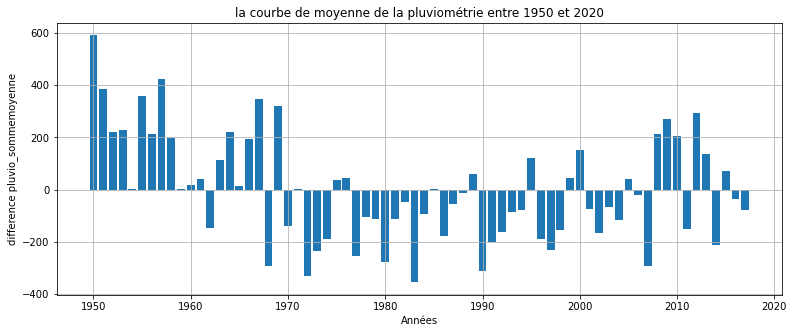

In [192]:
x6 = np.array(np.array(Fatick[Fatick.columns[0]]))
y6 = np.array(diff_pluvio)
largeur = 0.5
fig6, ax6 = plt.subplots(figsize=(13,5))
ax6.bar(x6,y6)
plt.title("la courbe de moyenne de la pluviométrie entre 1950 et 2020") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("difference pluvio_sommemoyenne")
plt.grid()
plt.show()

12. Reprendre les question 10 et 11 pour les intervalles d’années suivants :

        • Entre 1950 et 1969 

In [193]:
Df_pluvio_annuelle1 = annees1
Df_pluvio_annuelle1 = Df_pluvio_annuelle1.drop("Annees",axis=1)
som_pluvio_an1 = np.nansum(Df_pluvio_annuelle1, axis=1)
som_pluvio_an1

array([1220.2, 1015. ,  847.8,  858.8,  629.3,  988.3,  842.4, 1051. ,
        827.3,  630.1,  644.6,  668.2,  482.2,  740.7,  850.8,  643.1,
        823.8,  976.7,  335.3,  950. ])

In [194]:
diff_pluvio1 = som_pluvio_an1 - moy_somme
print("la différence entre le vecteur et sa moyenne est : \n",diff_pluvio1)

la différence entre le vecteur et sa moyenne est : 
 [ 591.49411766  386.29411766  219.09411766  230.09411766    0.59411766
  359.59411766  213.69411766  422.29411766  198.59411766    1.39411766
   15.89411766   39.49411766 -146.50588234  111.99411766  222.09411766
   14.39411766  195.09411766  347.99411766 -293.40588234  321.29411766]


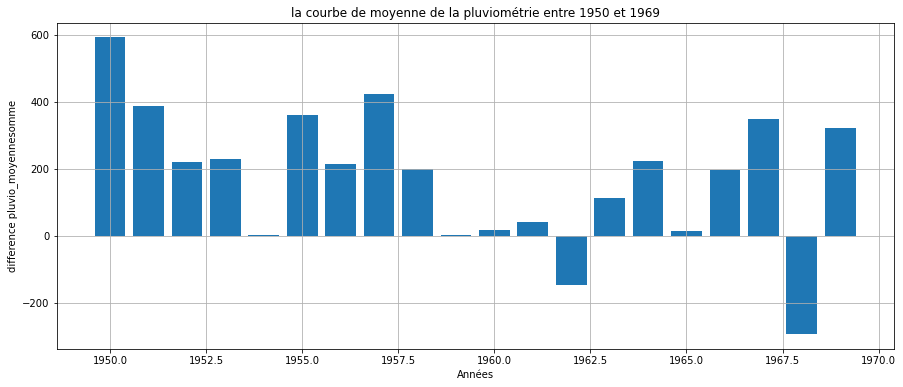

In [195]:
x7 = np.array(np.array(annees1[annees1.columns[0]]))
y7 = np.array(diff_pluvio1)
largeur = 0.5
fig7, ax7 = plt.subplots(figsize=(15,6))
ax7.bar(x7,y7)
plt.title("la courbe de moyenne de la pluviométrie entre 1950 et 1969") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("difference pluvio_moyennesomme")
plt.grid()
plt.show()

        • Entre 1970 et 1999

In [196]:
Df_pluvio_annuelle2 = annees2
Df_pluvio_annuelle2 = Df_pluvio_annuelle2.drop("Annees",axis=1)
som_pluvio_an2 = np.nansum(Df_pluvio_annuelle2, axis=1)
som_pluvio_an2

array([490.2       , 629.9       , 298.1       , 394.4       ,
       438.6       , 665.8       , 672.6       , 373.2       ,
       522.8       , 517.7       , 349.39999998, 514.19999996,
       579.19999991, 272.50000001, 534.79999998, 632.49999988,
       451.79999997, 574.79999982, 615.40000002, 688.79999988,
       314.69999999, 428.70000002, 466.70000003, 543.89999989,
       548.79999989, 747.89999996, 439.00000001, 396.79999996,
       472.59999991, 672.69999997])

In [197]:
diff_pluvio2 = som_pluvio_an2 - moy_somme
print("la différence entre le vecteur et sa moyenne est : \n",diff_pluvio2)

la différence entre le vecteur et sa moyenne est : 
 [-138.50588234    1.19411766 -330.60588234 -234.30588234 -190.10588234
   37.09411766   43.89411766 -255.50588234 -105.90588234 -111.00588234
 -279.30588236 -114.50588238  -49.50588242 -356.20588233  -93.90588236
    3.79411754 -176.90588236  -53.90588252  -13.30588232   60.09411754
 -314.00588235 -200.00588232 -162.00588231  -84.80588245  -79.90588245
  119.19411762 -189.70588233 -231.90588238 -156.10588243   43.99411763]


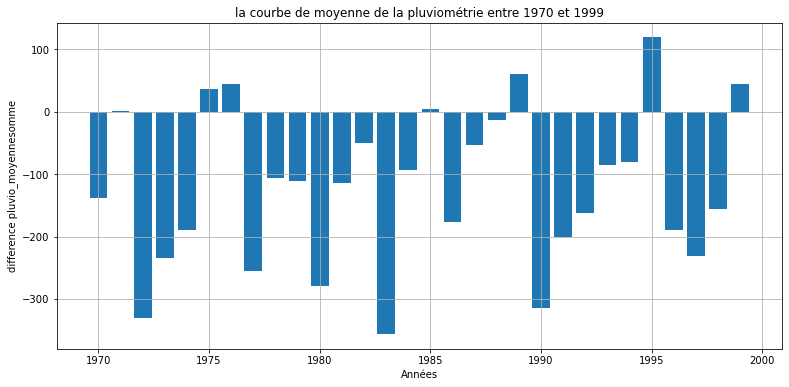

In [198]:
x8 = np.array(np.array(annees2[annees2.columns[0]]))
y8 = np.array(diff_pluvio2)
largeur = 0.5
fig8, ax8 = plt.subplots(figsize=(13,6))
ax8.bar(x8,y8)
plt.title("la courbe de moyenne de la pluviométrie entre 1970 et 1999") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("difference pluvio_moyennesomme")
plt.grid()
plt.show()

        • Entre 2000 et 2017

In [199]:
Df_pluvio_annuelle3 = annees3
Df_pluvio_annuelle3 = Df_pluvio_annuelle3.drop("Annees",axis=1)
som_pluvio_an3 = np.nansum(Df_pluvio_annuelle3, axis=1)
som_pluvio_an3

array([779.9, 555.9, 462.7, 560.5, 510.7, 668.8, 608.3, 336.6, 841. ,
       898. , 834.7, 476.4, 922.5, 764.7, 416.9, 698.2, 593. , 549.1])

In [200]:
diff_pluvio3 = som_pluvio_an3 - moy_somme
print("la différence entre le vecteur et sa moyenne est : \n",diff_pluvio3)

la différence entre le vecteur et sa moyenne est : 
 [ 151.19411766  -72.80588234 -166.00588234  -68.20588234 -118.00588234
   40.09411766  -20.40588234 -292.10588234  212.29411766  269.29411766
  205.99411766 -152.30588234  293.79411766  135.99411766 -211.80588234
   69.49411766  -35.70588234  -79.60588234]


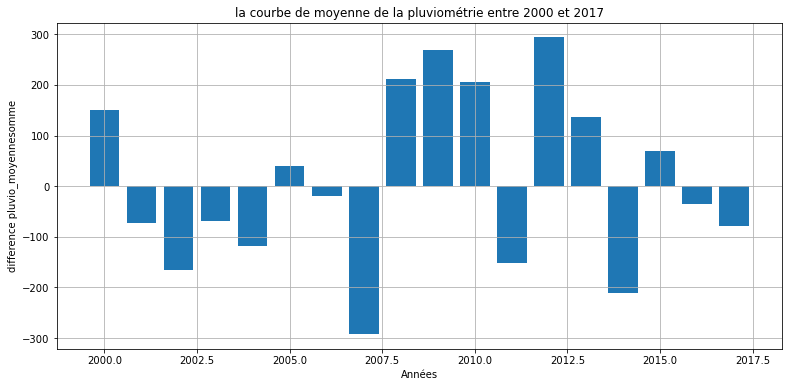

In [201]:
x9 = np.array(np.array(annees3[annees3.columns[0]]))
y9 = np.array(diff_pluvio3)
largeur = 0.5
fig9, ax9 = plt.subplots(figsize=(13,6))
ax9.bar(x9,y9)
plt.title("la courbe de moyenne de la pluviométrie entre 2000 et 2017") # Titre de la figure
plt.xlabel("Années") # Label sur l'axe des abscisses
plt.ylabel("difference pluvio_moyennesomme")
plt.grid()
plt.show()

13. Écrire un programme qui insère dans le fichier pluvio_senegal.xlsx les courbes des questions précédentes avec des feuilles différentes.

In [202]:
#courbe de la moyenne annuelle
pluie_Fatick = pluie.Book("pluvio_senegal.xlsx")
pluie_Fatick.sheets.add("Pluvio_mensuelle_Fatick")
feuille = pluie_Fatick.sheets("Pluvio_mensuelle_Fatick")
ax10 = ax10.get_figure()
feuille.pictures.add(ax10, name="Pluvio_mensuelle_Fatick", update=True)
plt.show()
# Diagramme en bar de l'ecart-type
ecart_type_Fatick = pluie.Book("pluvio_senegal.xlsx")
ecart_type_Fatick.sheets.add("Ecart-type_Fatick")
feuille = ecart_type_Fatick.sheets("Ecart-type_Fatick")
ax6 = ax6.get_figure()
feuille.pictures.add(ax6, name="type_Fatick", update=True)
plt.show()
# Diagramme en bar de l'ecart-type des annees 1950-1969
ecart_type_Fatick1 = pluie.Book("pluvio_senegal.xlsx")
ecart_type_Fatick1.sheets.add("Ecart-type_Fatick(1950-1969)")
feuille = ecart_type_Fatick1.sheets("Ecart-type_Fatick(1950-1969)")
ax7 = ax7.get_figure()
feuille.pictures.add(ax7, name="type_Fatick(1950-1969)", update=True)
plt.show()
# Diagramme en bar de l'ecart-type des annees 1970-2000
ecart_type_Fatick2 = pluie.Book("pluvio_senegal.xlsx")
ecart_type_Fatick2.sheets.add("Ecart-type_Fatick(1970-1999)")
feuille = ecart_type_Fatick2.sheets("Ecart-type_Fatick(1970-1999)")
ax8 = ax8.get_figure()
feuille.pictures.add(ax8, name="type_Fatick(1970-1999)", update=True)
plt.show()
# Diagramme en bar de l'ecart-type des annees 1970-2000
ecart_type_Fatick3 = pluie.Book("pluvio_senegal.xlsx")
ecart_type_Fatick3.sheets.add("Ecart-type_Fatick(2000-2017)")
feuille = ecart_type_Fatick3.sheets("Ecart-type_Fatick(2000-2017)")
ax9 = ax9.get_figure()
feuille.pictures.add(ax9, name="type_Fatick(2000-2017)", update=True)
plt.show()